In [1]:
import scanpy as sc
import scipy as sp
import numpy as np
import utils

# Gaussian neibourhood generation using MrVI latent space 

In [3]:
# ranked_genes_gauss = utils.mrvi_identify_cell_states(adata, 'X_mrvi_z', neighbor_method='gauss')

In [4]:
#adata_gauss = utils.load_pickle('./../data/pickles/processed_adata.pickle')
#adata_gauss

In [5]:
#adata_gauss.obsp['connectivities'] = sp.sparse.csr_matrix(adata_gauss.obsp['connectivities'], dtype=np.float32)

In [6]:
#sc.tl.umap(adata_gauss)

# KNN neighbourhood generation using MrVI latent space

In [2]:
adata_knn = sc.read('./../data/MrVIoutputs/bacdrop.h5ad')
adata_knn

AnnData object with n_obs × n_vars = 34410 × 3766
    obs: 'sample', 'replicate', '_scvi_sample', '_scvi_labels', 'n_genes'
    var: 'n_cells'
    uns: '_scvi_manager_uuid', '_scvi_uuid'
    obsm: 'X_mrvi_u', 'X_mrvi_z', '_scvi_categorical_nuisance_keys'

In [3]:
sc.pp.filter_cells(adata_knn, min_genes=35)
sc.pp.normalize_total(adata_knn, target_sum=5000)
sc.pp.log1p(adata_knn)

adata_knn.raw = adata_knn

sc.pp.neighbors(adata_knn, use_rep='X_mrvi_z', knn=True)

sc.tl.leiden(adata_knn)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
sc.tl.rank_genes_groups(adata_knn, 'leiden', method='t-test')
sc.tl.umap(adata_knn)
adata_knn


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scanp

AnnData object with n_obs × n_vars = 9265 × 3766
    obs: 'sample', 'replicate', '_scvi_sample', '_scvi_labels', 'n_genes', 'leiden'
    var: 'n_cells'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'log1p', 'neighbors', 'leiden', 'rank_genes_groups', 'umap'
    obsm: 'X_mrvi_u', 'X_mrvi_z', '_scvi_categorical_nuisance_keys', 'X_umap'
    obsp: 'distances', 'connectivities'

# UMAP Clustering Comparison Visual

In [5]:
# Not informative (UMAP provides the better 2D representation)
# sc.pl.embedding(adata, basis='X_mrvi_z', color='leiden', use_raw=False)
#adata_gauss

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


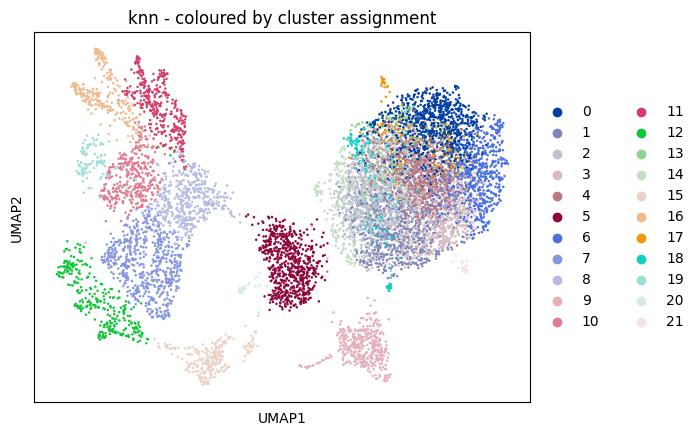

In [6]:
sc.pl.umap(adata_knn, use_raw=False, color='leiden', title="knn - coloured by cluster assignment")

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


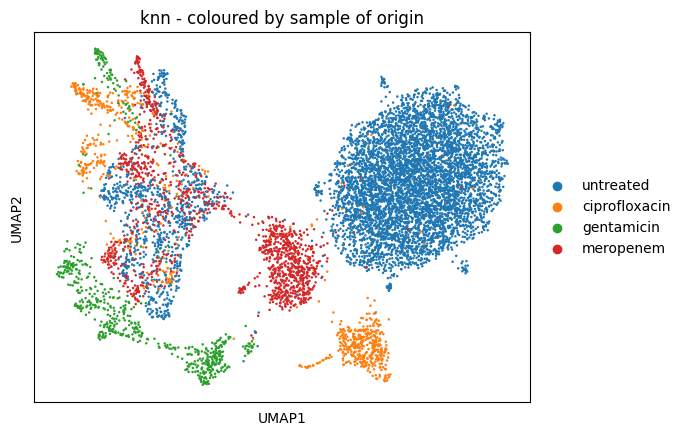

In [7]:
sc.pl.umap(adata_knn, use_raw=False, color='sample', title="knn - coloured by sample of origin")

/home/dennis/miniconda3/envs/compbioGPU/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


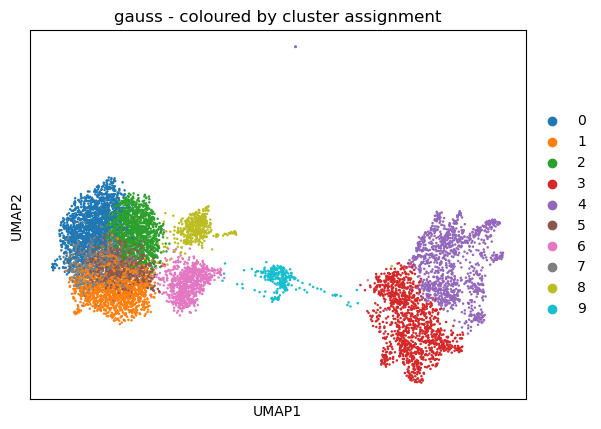

In [ ]:
sc.pl.umap(adata_gauss, use_raw=False, color='leiden', title="gauss - coloured by cluster assignment")

/home/dennis/miniconda3/envs/compbioGPU/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


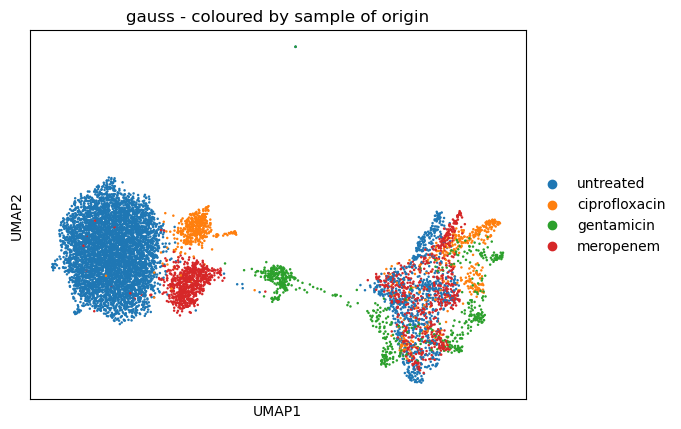

In [ ]:
sc.pl.umap(adata_gauss, use_raw=False, color='sample', title="gauss - coloured by sample of origin")

# Visualizing dispersion of significant 'genes' (accession numbers)
<pre>
cds-WP_032429669.1    => porin OmpC (Forms pores that allow passive diffusion of small molecules across the outer membrane.)</br>
cds-WP_004177236.1    => Acriflavine resistance protein A Confers AMR </br>
cds-WP_013815099.1-12 => IS5-like element IS903B family transposase </br>
cds-WP_004177236.1    => multidrug efflux RND transporter periplasmic adaptor subunit AcrA
cds-WP_187079192.1    => IS5-like element IS903B family transposase </br>
cds-WP_002919766.1    => 30S ribosomal protein S3 </br>
cds-WP_013815099.1-30 => IS5-like element IS903B family transposase
cds-WP_004145074.1    => heat shock chaperone IbpB
</pre>

In [8]:
sc.pl.umap(adata_gauss, color=['cds-WP_032429669.1', 'cds-WP_004177236.1', 'cds-WP_013815099.1-12','cds-WP_004177236.1',
                               'cds-WP_187079192.1', 'cds-WP_002919766.1', 'cds-WP_013815099.1-30', 'cds-WP_004145074.1'])
# adata_knn.var_names.__contains__('cds-WP_187079192.1')

NameError: name 'adata_gauss' is not defined

In [10]:
adata_u_gauss = sc.read('./../data/adata_u_gauss.h5ad')
adata_z_gauss = sc.read('./../data/adata_z_gauss.h5ad')

adata_u_knn = sc.read('./../data/adata_u_knn.h5ad')
adata_z_knn = sc.read('./../data/adata_z_knn.h5ad')

In [15]:
adata_u_gauss

AnnData object with n_obs × n_vars = 6914 × 3867
    obs: 'sample', 'replicate', 'n_genes', '_scvi_sample', '_scvi_labels', 'leiden'
    var: 'n_cells'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'leiden', 'neighbors', 'umap'
    obsm: 'X_mrvi_u', 'X_mrvi_z', 'X_umap', '_scvi_categorical_nuisance_keys'
    obsp: 'connectivities', 'distances'

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


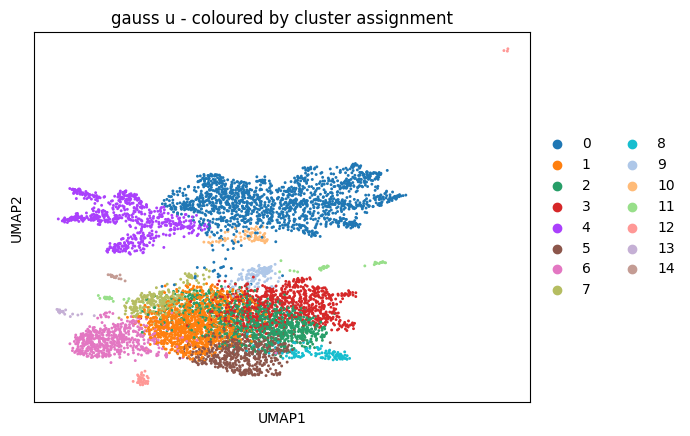

In [19]:
sc.pl.umap(adata_u_gauss, use_raw=False, color='leiden', title="gauss u - coloured by cluster assignment")

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


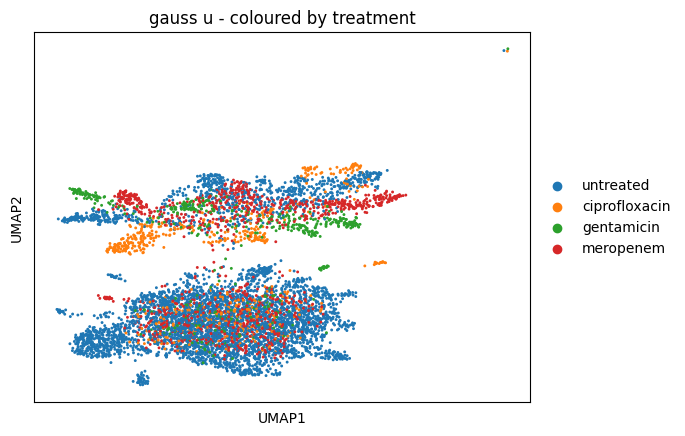

In [69]:
sc.pl.umap(adata_u_gauss, use_raw=False, color='sample', title="gauss u - coloured by treatment")

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


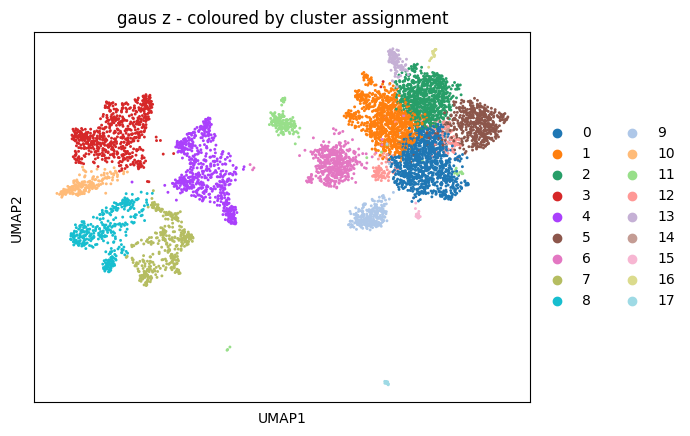

In [20]:
sc.pl.umap(adata_z_gauss, use_raw=False, color='leiden', title="gaus z - coloured by cluster assignment")

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


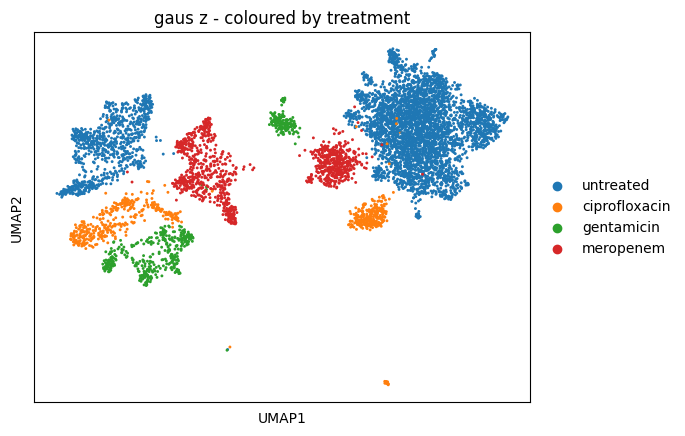

In [70]:
sc.pl.umap(adata_z_gauss, use_raw=False, color='sample', title="gaus z - coloured by treatment")

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


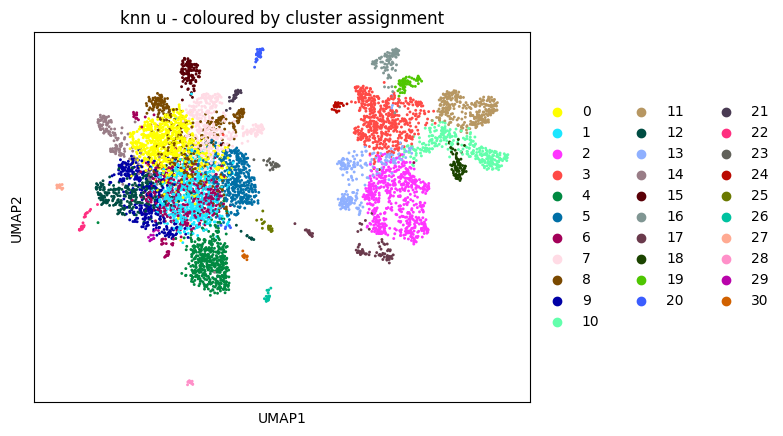

In [21]:
sc.pl.umap(adata_u_knn, use_raw=False, color='leiden', title="knn u - coloured by cluster assignment")

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


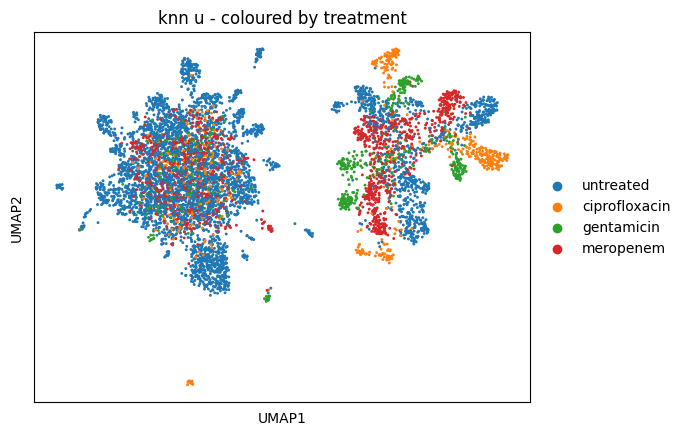

In [71]:
sc.pl.umap(adata_u_knn, use_raw=False, color='sample', title="knn u - coloured by treatment")

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


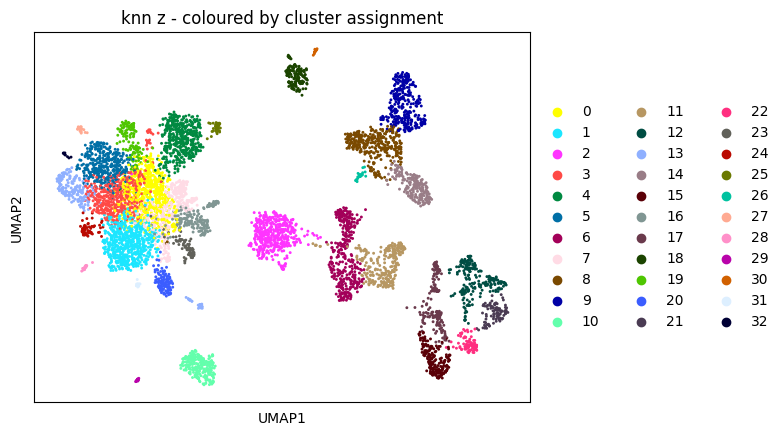

In [22]:
sc.pl.umap(adata_z_knn, use_raw=False, color='leiden', title="knn z - coloured by cluster assignment")

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


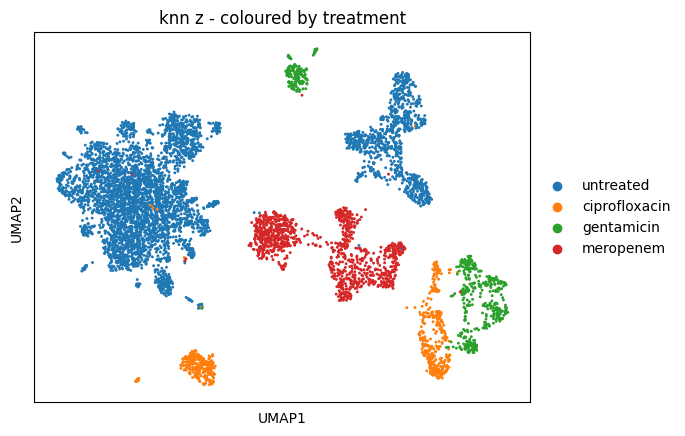

In [72]:
sc.pl.umap(adata_z_knn, use_raw=False, color='sample', title="knn z - coloured by treatment")

In [23]:
from matplotlib.pyplot import rc_context

In [98]:
sc.pp.log1p(adata_z_gauss)

In [103]:
adata_z_gauss.raw = adata_z_gauss

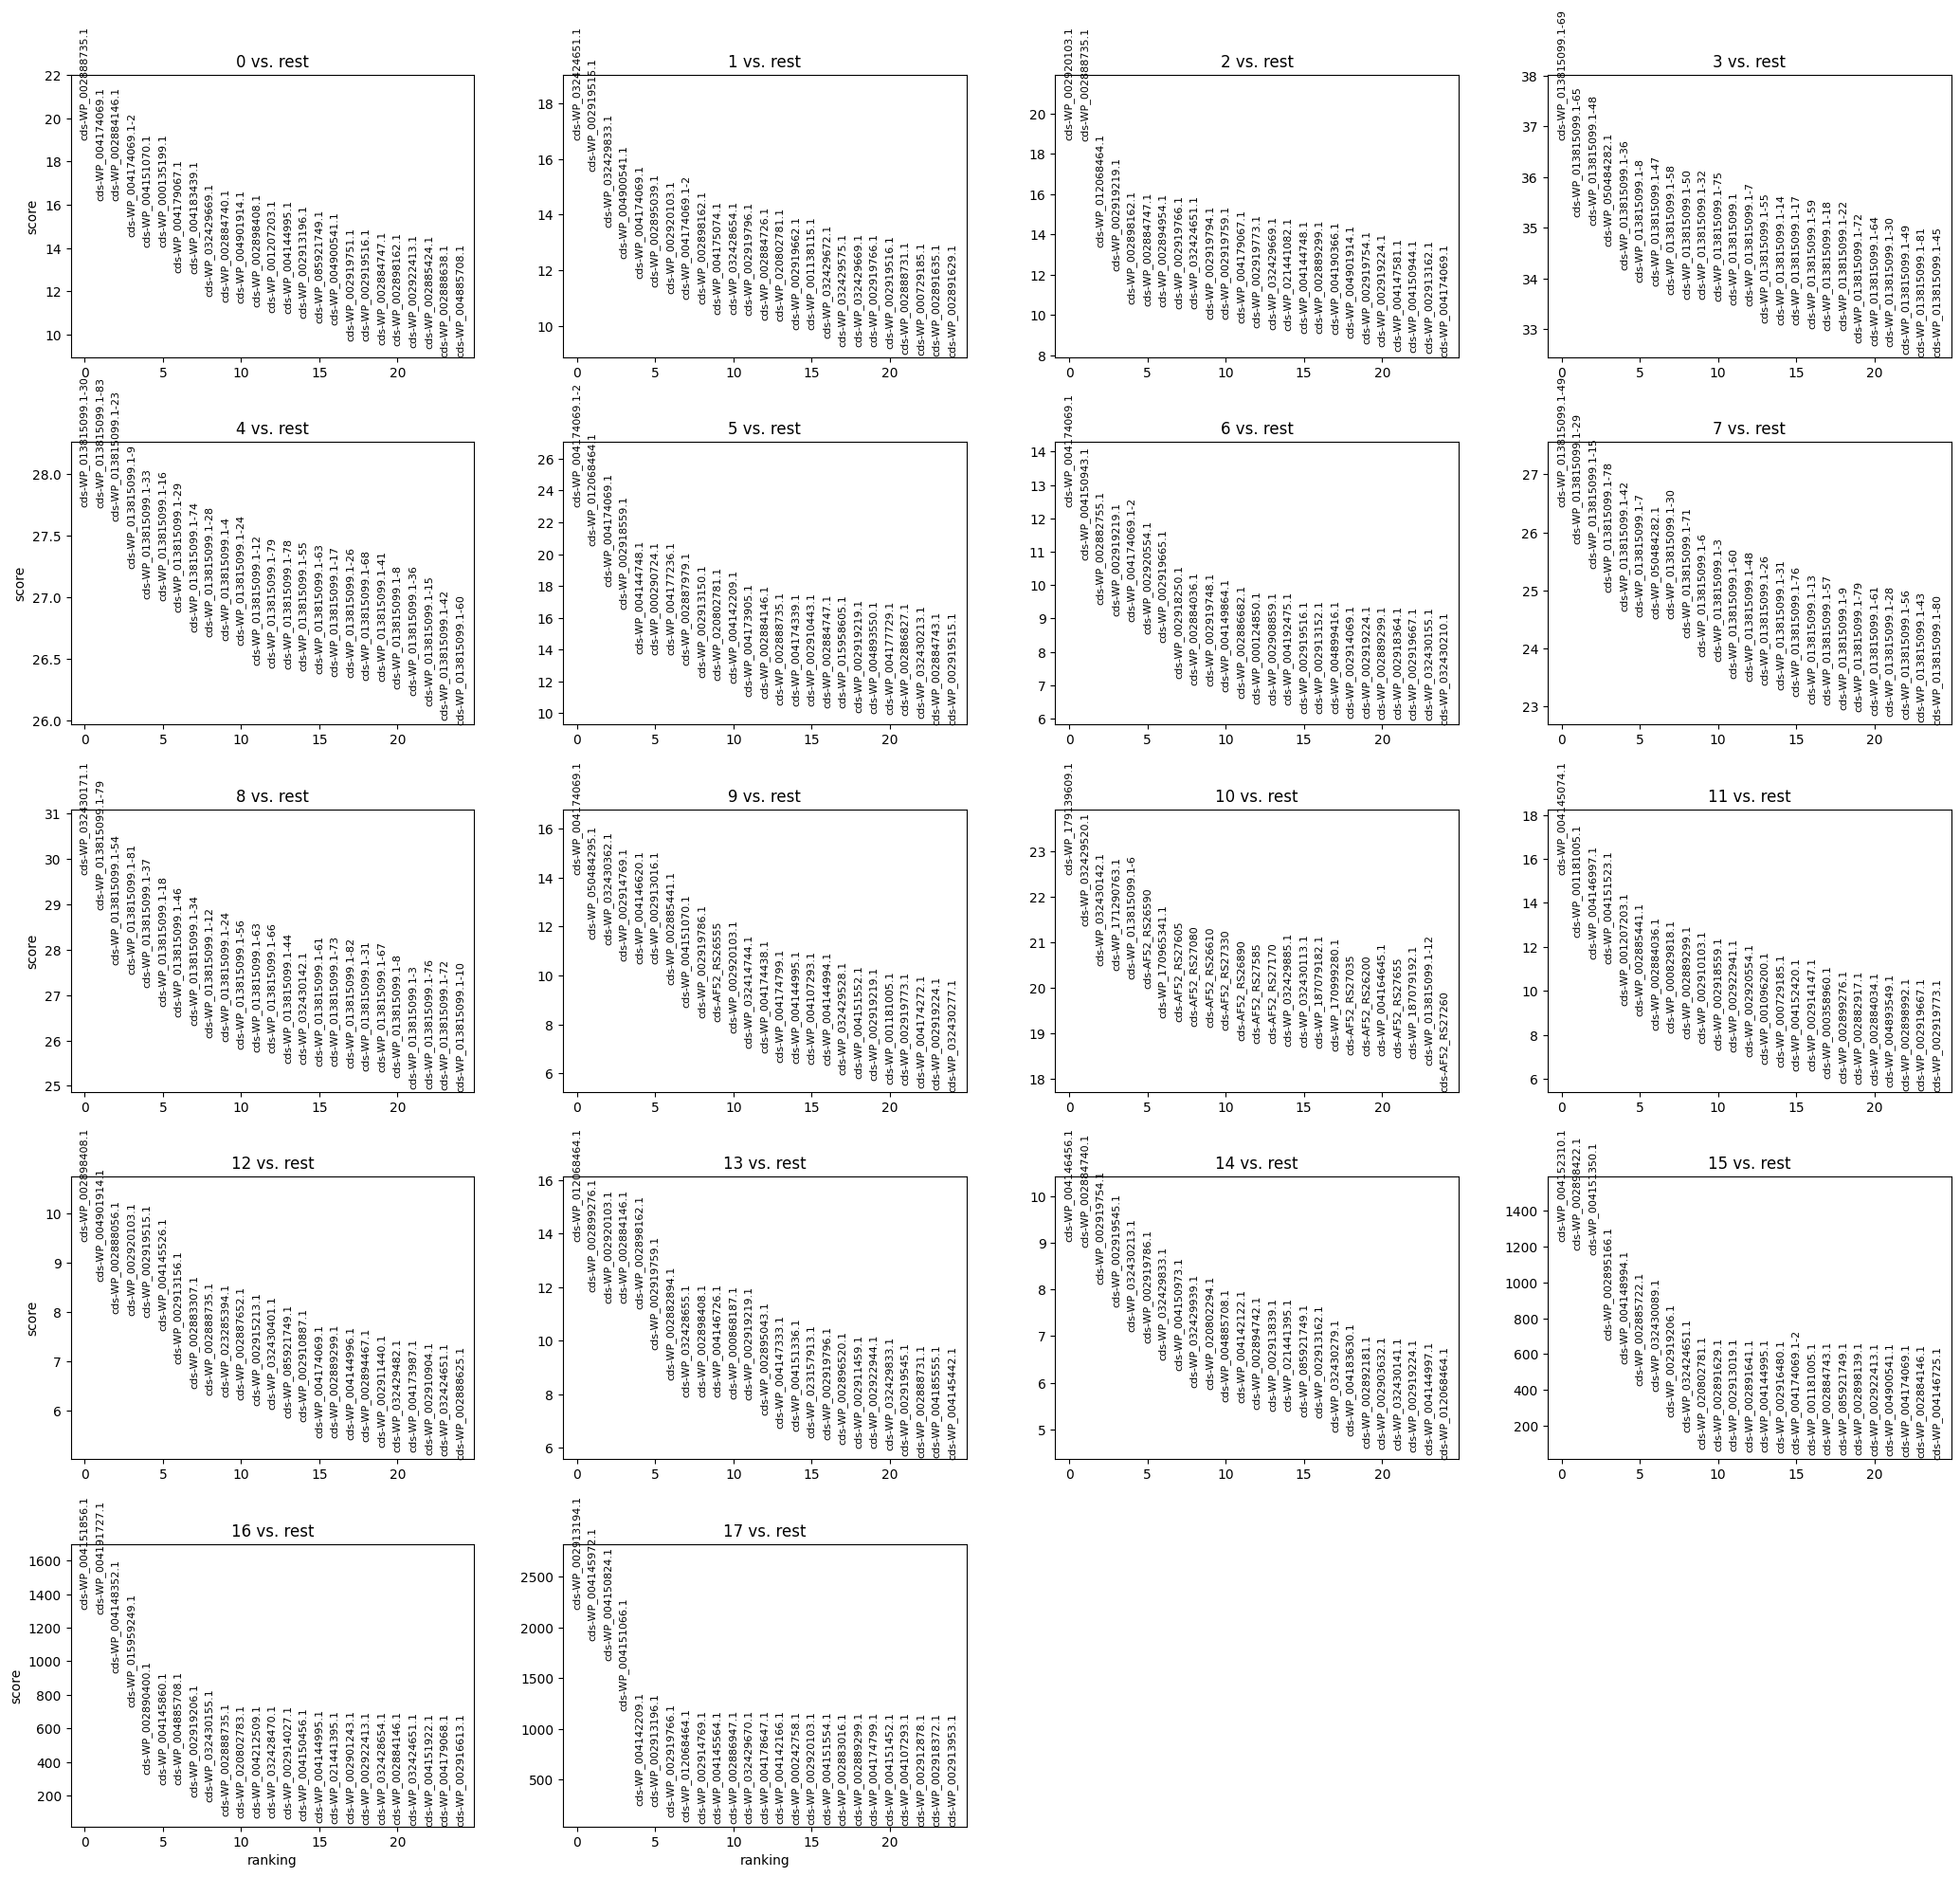

In [104]:
sc.tl.rank_genes_groups(adata_z_gauss, 'leiden', method='t-test')
sc.pl.rank_genes_groups(adata_z_gauss, n_genes=25, sharey=False)

In [194]:
sc.get.rank_genes_groups_df(adata_z_gauss, group='6').head(25)

,names,scores,logfoldchanges,pvals,pvals_adj
0,cds-WP_004174069.1,12.336491,0.521733,3.064723e-31,6.733683e-30
1,cds-WP_004150943.1,10.762234,3.321188,2.507034e-24,5.075760e-23
2,cds-WP_002882755.1,9.419717,2.215738,1.824067e-19,3.407570e-18
3,cds-WP_002919219.1,9.073482,0.773194,2.280353e-18,4.179206e-17
4,cds-WP_004174069.1-2,8.899870,0.463182,7.682604e-18,1.381797e-16
5,cds-WP_002920554.1,8.548476,2.850577,1.682662e-16,2.944277e-15
6,cds-WP_002919665.1,8.300765,1.292615,9.532377e-16,1.638298e-14
7,cds-WP_002918250.1,7.202072,1.460147,2.207351e-12,3.373844e-11
8,cds-WP_002884036.1,7.009207,0.905362,7.557894e-12,1.115511e-10
9,cds-WP_002919748.1,6.985365,1.803834,9.286824e-12,1.365481e-10


In [223]:
marker_genes_dict = {
    'MGE': ['cds-WP_013815099.1', 'cds-WP_050484282.1', 'cds-WP_032175380.1'], # IS5-like element IS903B family transposase, IS5 family transposase, IS5/IS1182 family transposase
    'DNA replication': ['cds-WP_032430210.1', 'cds-WP_004149864.1', 'cds-WP_002913016.1', 'cds-WP_004150943.1', 'cds-WP_004150943.1'], # FtsI, DNA primase, ribonucleoside-diphosphate reductase subunit alpha, ATP-dependent RNA helicase DeaD, ATP-dependent RNA helicase DeaD
    'Heat shock response': ['cds-WP_004145074.1', 'cds-WP_004151523.1', 'cds-WP_002885441.1', 'cds-WP_004146997.1'], # IbpB, IbpA, groEL, #DnaK,
    'DNA damage response': ['cds-WP_004146620.1', 'cds-WP_002914769.1', 'cds-WP_032414744.1'], # UvrA, RecA,  DinI
    'Multidrug Efflux': ['cds-WP_004177236.1'], # AcrA,
}


In [230]:
# create a dictionary to map cluster to annotation label
cluster2annotation = {
     '0': 'Untreated',
     '1': 'Untreated',
     '2': 'Untreated',
     '3': 'Untreated',
     '4': 'MGE',
     '5': 'Untreated',
     '6': 'Ambiguous',
     '7': 'MGE',
     '8': 'MGE',
     '9': 'DNA Damage Response',
     '10': 'Untreated',
     '11': 'Heat Shock Response',
     '12': 'Untreated',
     '13': 'Untreated',
     '14': 'DNA Damage Response',
     '15': 'Untreated',
     '16': 'Untreated',
     '17': 'Untreated',
}

# add a new `.obs` column called `cell type` by mapping clusters to annotation using pandas `map` function
adata_z_gauss.obs['cell type'] = adata_z_gauss.obs['leiden'].map(cluster2annotation).astype('category')

categories: 0, 1, 2, etc.
var_group_labels: MGE, DNA replication, Heat shock response, etc.


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


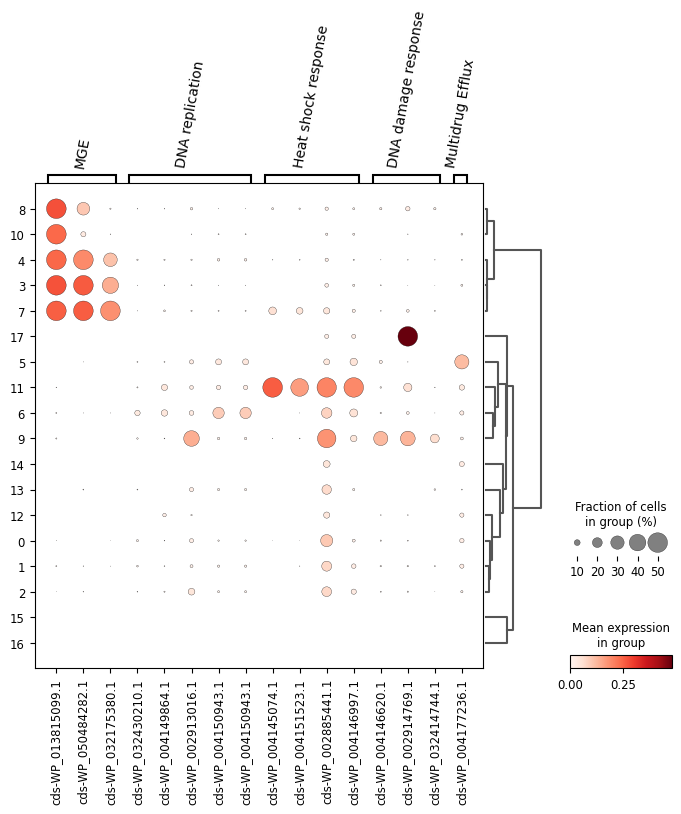

In [231]:
sc.pl.dotplot(adata_z_gauss, marker_genes_dict, 'leiden', dendrogram=True, dot_max=0.5, var_group_rotation=80)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


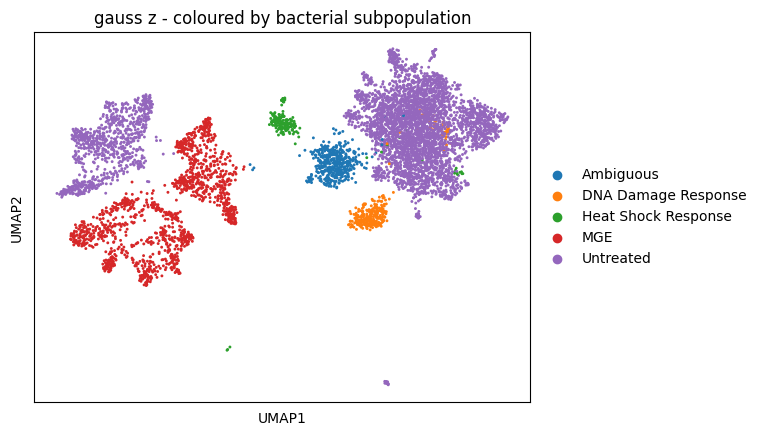

In [232]:
sc.pl.umap(adata_z_gauss, use_raw=False, color='cell type', title="gauss z - coloured by bacterial subpopulation")

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


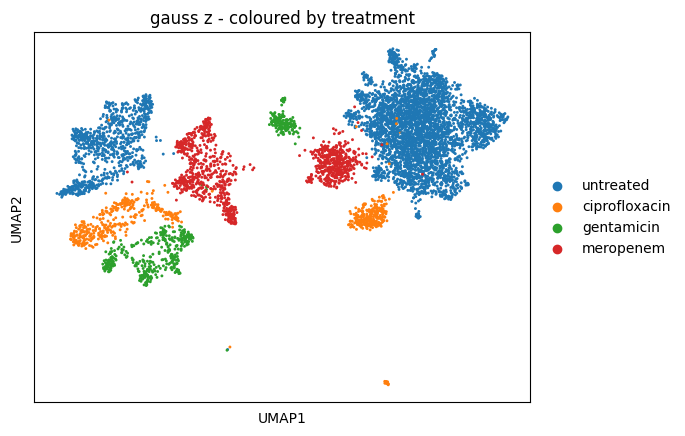

In [204]:
sc.pl.umap(adata_z_gauss, use_raw=False, color='sample', title="gauss z - coloured by treatment")